# SMAI Assignment - 2

## Question 3: Face Recognition using Principal Component Analysis

This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA)
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Tasks
1. Load dataset and divide the date into training and test sets.
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.

#### Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import cv2
from copy import copy
from tqdm import tqdm

#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [ ]:
import os
import cv2
import numpy as np
from google.colab import drive

drive.mount('/content/drive')


folder_path = '/content/drive/My Drive/ATnT'

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1, 41):
    for j in range(1, 11):
        imgPath = os.path.join(folder_path, "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)


randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)):]
testLabels = labels[int(trainAmt*len(allFaces)):]

# 112x92 (= 10304) grayscale images, 360 in train, 40 in test
print(trainFaces.shape, trainLabels.shape)


Mounted at /content/drive
(360, 112, 92) (360,)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

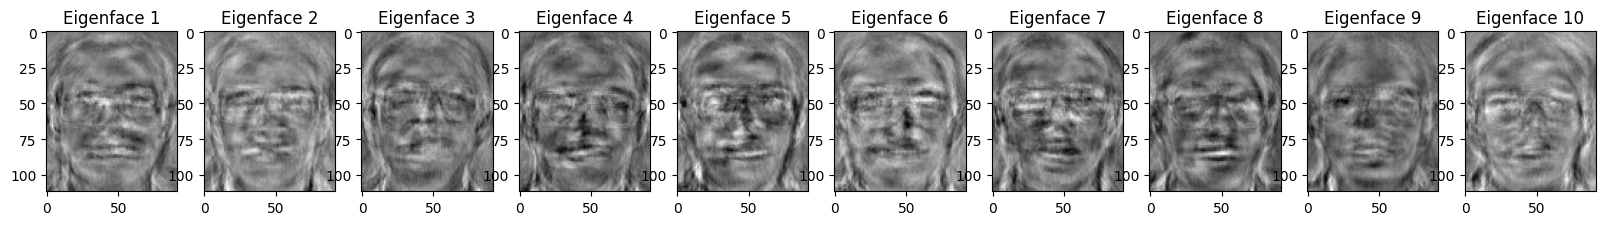

In [ ]:
import numpy as np

def principalComponentAnalysis(X, numComponents):
    # Reshape X to have only two dimensions
    num_samples, height, width = X.shape
    X_flat = X.reshape(num_samples, height * width)

    # Step 1: Compute the mean face
    mean_face = np.mean(X_flat, axis=0)

    # Step 2: Subtract the mean
    centered_X = X_flat - mean_face

    # Step 3: Compute the covariance matrix
    covariance_matrix = np.cov(centered_X, rowvar=False)

    # Step 4: Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Step 5: Select top eigenfaces
    top_eigenvectors = eigenvectors[:, -numComponents:]

    # Step 6: Return eigenfaces
    return top_eigenvectors


import matplotlib.pyplot as plt

def plot_eigenfaces(eigenfaces, num_components):
    fig, axes = plt.subplots(1, num_components, figsize=(20, 5))

    for i in range(num_components):
        eigenface = eigenfaces[:, i]
        eigenface_image = eigenface.reshape(image_height, image_width)
        axes[i].imshow(eigenface_image, cmap='gray')
        axes[i].set_title(f'Eigenface {i+1}')

    plt.show()

desired_variance_ratio = 0.95
numComponents = 70
X=allFaces

eigenfaces = principalComponentAnalysis(X, numComponents)

# Define the number of components (eigenfaces) to plot
num_components_to_plot = 10
image_height=112
image_width=92

plot_eigenfaces(eigenfaces, num_components_to_plot)


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

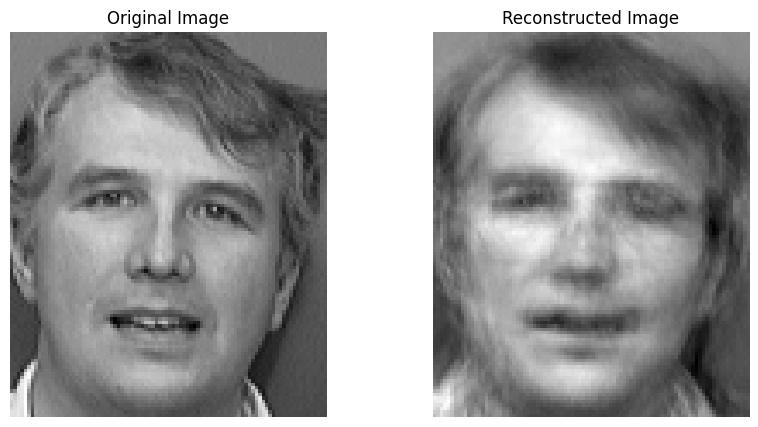

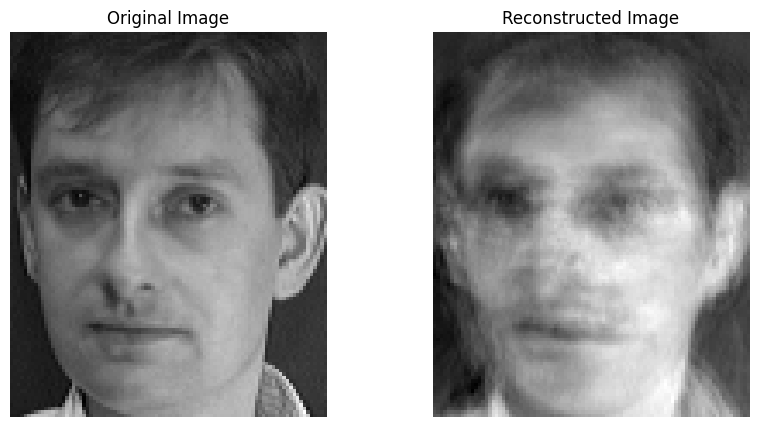

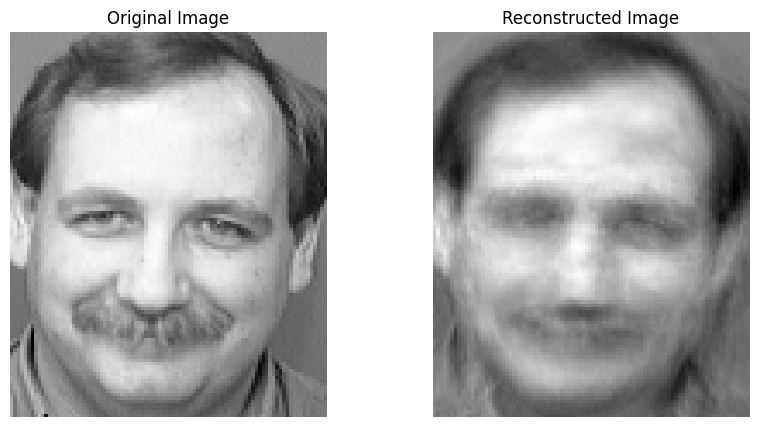

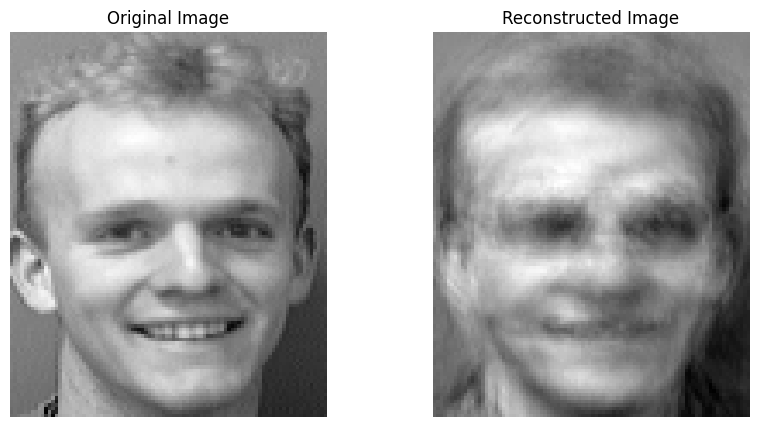

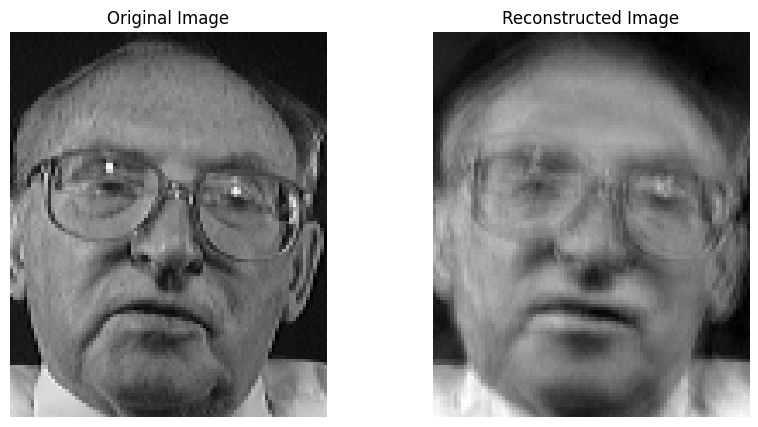

In [ ]:
import matplotlib.pyplot as plt

def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """

    # Subtract the mean face from the test face
    centered_test_face = testFace - meanFace

    # Flatten the centered test face to a 1D array
    centered_test_face_flat = centered_test_face.flatten()

    # Project the centered test face onto the eigenfaces
    projections = np.dot(centered_test_face_flat, eigenFaces)

    # Reshape projections to be a row vector
    projections = projections.reshape(1, -1)

    # Reconstruct the test face using the eigenface projections
    reconstructed_face = meanFace + np.dot(projections, eigenFaces.T).reshape(testFace.shape)

    return reconstructed_face

num_test_faces = 5


meanFace = np.mean(trainFaces, axis=0)

for i in range(num_test_faces):
    test_face = testFaces[i]
    reconstructed_face = imageReconstruction(test_face, eigenfaces, meanFace)

    # Plot original and reconstructed images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(test_face, cmap='gray')
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(reconstructed_face, cmap='gray')
    plt.title("Reconstructed Image")
    plt.axis("off")

    plt.show()


#### Visualisation
Visualise the results for different number of factors(pc = 5, 10, 50, 100, etc.)

**Note:** Ensure that the images are labelled appropriately.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def displayNfactors(testFaces, eigenfaces, meanFace, pc_values):
    num_test_faces = len(testFaces)

    for pc in pc_values:

        top_eigenfaces = eigenfaces[:, -pc:]

        plt.figure(figsize=(112,92))
        print("Number of components" ,pc)

        for i, test_face in enumerate(testFaces, start=1):
            reconstructed_face = imageReconstruction(test_face, top_eigenfaces, meanFace)


            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(test_face, cmap='gray')
            plt.title("Original Image")
            plt.axis("off")

            plt.subplot(1, 2, 2)
            plt.imshow(reconstructed_face, cmap='gray')
            plt.title("Reconstructed Image")
            plt.axis("off")

            plt.show()

pc_values = [5, 10, 50, 100]
displayNfactors(testFaces, eigenfaces, meanFace, pc_values)


#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them.
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations.
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

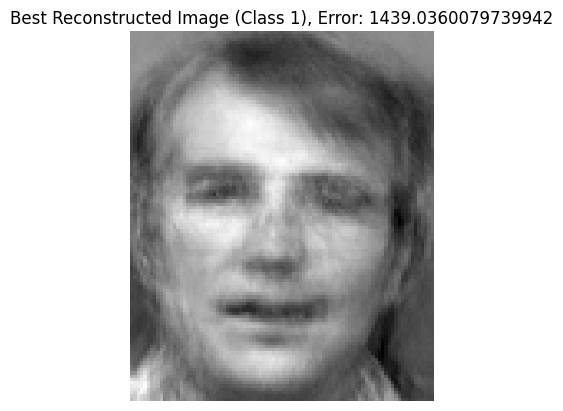

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def compute_mean_face(X_train):
    return np.mean(X_train, axis=0)

def imageReconstruction(testFace, eigenFaces, meanFace):
    """
    Helper function to reconstruct images
    """


    centered_test_face = testFace - meanFace


    centered_test_face_flat = centered_test_face.flatten()


    projections = np.dot(centered_test_face_flat, eigenFaces)


    projections = projections.reshape(1, -1)


    reconstructed_face = meanFace + np.dot(projections, eigenFaces.T).reshape(testFace.shape)

    return reconstructed_face


def getClass(test_face, eigenfaces, mean_face, X_train, y_train):
    min_error = float('inf')
    predicted_class = None
    best_reconstructed_face = None

    for class_label in np.unique(y_train):

        class_indices = np.where(y_train == class_label)[0]
        class_faces = X_train[class_indices]

        for train_face in class_faces:
            reconstructed_face = imageReconstruction(test_face, eigenfaces, mean_face)
            error = np.linalg.norm(reconstructed_face - test_face)
            if error < min_error:
                min_error = error
                predicted_class = class_label
                best_reconstructed_face = reconstructed_face

    return best_reconstructed_face, min_error, predicted_class

trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)):]
testLabels = labels[int(trainAmt*len(allFaces)):]
X_train=trainFaces
y_train=trainLabels

mean_face = compute_mean_face(X_train)


best_reconstructed_face, min_error, predicted_class = getClass(test_face, eigenfaces, mean_face, X_train, y_train)


plt.imshow(best_reconstructed_face, cmap='gray')
plt.title(f"Best Reconstructed Image (Class {predicted_class}), Error: {min_error}")
plt.axis("off")
plt.show()


Iterate through all the images in the test data and test the accuracy by taking different number of components

Mounted at /content/drive
(360, 112, 92) (360,)


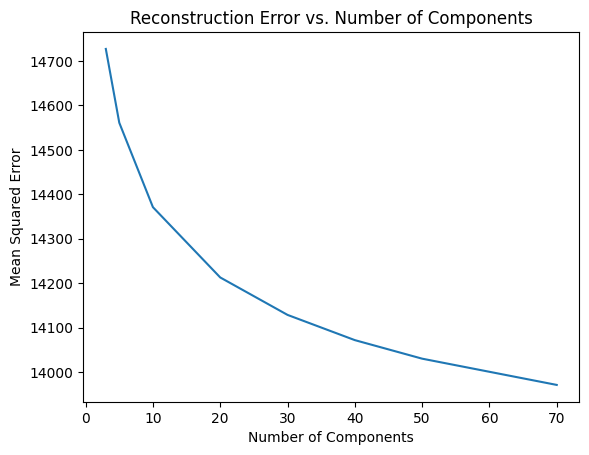

In [ ]:
import os
import cv2
import numpy as np
from google.colab import drive


drive.mount('/content/drive')


folder_path = '/content/drive/My Drive/ATnT'

trainAmt = 0.9
allFaces = []
labels = []

for i in range(1, 41):
    for j in range(1, 11):
        imgPath = os.path.join(folder_path, "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)

        allFaces.append(img)
        labels.append(i)


randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]


trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]

testFaces = allFaces[int(trainAmt*len(allFaces)):]
testLabels = labels[int(trainAmt*len(allFaces)):]


print(trainFaces.shape, trainLabels.shape)

import numpy as np

def principalComponentAnalysis(X, numComponents):

    num_samples, height, width = X.shape
    X_flat = X.reshape(num_samples, height * width)


    mean_face = np.mean(X_flat, axis=0)


    centered_X = X_flat - mean_face


    covariance_matrix = np.cov(centered_X, rowvar=False)


    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)


    top_eigenvectors = eigenvectors[:, -numComponents:]


    return top_eigenvectors


import matplotlib.pyplot as plt

def plot_eigenfaces(eigenfaces, num_components):
    fig, axes = plt.subplots(1, num_components, figsize=(20, 5))

    for i in range(num_components):
        eigenface = eigenfaces[:, i]
        eigenface_image = eigenface.reshape(image_height, image_width)
        axes[i].imshow(eigenface_image, cmap='gray')
        axes[i].set_title(f'Eigenface {i+1}')

    plt.show()

def calculate_reconstruction_error(X, numComponents, eigenfaces):
    num_samples, height, width = X.shape
    X_flat = X.reshape(num_samples, height * width)
    mean_face = np.mean(X_flat, axis=0)

    centered_X = X_flat - mean_face

    reconstructed_X = np.dot(np.dot(centered_X, eigenfaces), eigenfaces.T) + mean_face
    mse = np.mean((centered_X - reconstructed_X)**2)
    return mse

desired_variance_ratio = 0.95
components = [3, 5, 10, 20, 30, 40, 50, 70]
mse = []
image_height=112
image_width=92
for numComponents in components:
    eigenfaces = principalComponentAnalysis(trainFaces, numComponents)
    mse.append(calculate_reconstruction_error(trainFaces, numComponents, eigenfaces))

plt.plot(components, mse)
plt.title('Reconstruction Error vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.show()


Plot Number of eigenvectors vs Mean Square Error

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
folder_path = '/content/drive/My Drive/ATnT'
trainAmt = 0.9
allFaces = []
labels = []

for i in range(1, 41):
    for j in range(1, 11):
        imgPath = os.path.join(folder_path, "s" + str(i), str(j) + ".pgm")
        img = cv2.imread(imgPath, -1)
        allFaces.append(img)
        labels.append(i)

randomOrder = np.random.permutation(len(labels))
allFaces = np.array(allFaces)[randomOrder]
labels = np.array(labels)[randomOrder]

trainFaces = allFaces[:int(trainAmt*len(allFaces))]
trainLabels = labels[:int(trainAmt*len(allFaces))]
testFaces = allFaces[int(trainAmt*len(allFaces)):]
testLabels = labels[int(trainAmt*len(allFaces)):]

components = range(1, trainFaces.shape[0] + 1)
mse = []
def principalComponentAnalysis(X, numComponents):
    num_samples, height, width = X.shape
    X_flat = X.reshape(num_samples, height * width)
    mean_face = np.mean(X_flat, axis=0)
    centered_X = X_flat - mean_face
    covariance_matrix = np.cov(centered_X, rowvar=False)
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    top_eigenvectors = eigenvectors[:, -numComponents:]
    return top_eigenvectors

def calculate_reconstruction_error(X, numComponents, eigenfaces):
    num_samples, height, width = X.shape
    X_flat = X.reshape(num_samples, height * width)
    mean_face = np.mean(X_flat, axis=0)
    centered_X = X_flat - mean_face
    reconstructed_X = np.dot(np.dot(centered_X, eigenfaces), eigenfaces.T) + mean_face
    mse = np.mean((centered_X - reconstructed_X)**2)
    return mse

components = [3, 5, 10, 20]

for numComponents in components:
    eigenfaces = principalComponentAnalysis(trainFaces, numComponents)
    mse.append(calculate_reconstruction_error(trainFaces, numComponents, eigenfaces))

plt.plot(components, mse)
plt.title('Number of Eigenvectors vs Mean Squared Error')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Mean Squared Error')
plt.show()


Plot Number of eigenvectors vs Logarithmic Mean Square Error

In [ ]:

import matplotlib.pyplot as plt


plt.plot(components, np.log(mse))  # Taking logarithm of MSE values
plt.title('Number of Eigenvectors vs Logarithmic Mean Squared Error')
plt.xlabel('Number of Eigenvectors')
plt.ylabel('Logarithmic Mean Squared Error')
plt.show()
